# Aggregate and Calculate Proportions
In this exercise we will explore `Hispanic racial identity`. Hispanics self-identify as a variety of races. We will use the `.sum()` method to help calculate national percentages of Hispanics identifying as each race.

Census workers are often promulgating information to the public, who are used to seeing proportions as percentages. For this reason, we will use percentages.

In [ ]:
import pandas as pd

Load into the data frame `states` the State-level counts from table `P5 - Hispanic or Latino Origin by Race`  

In [2]:
states = pd.read_csv('../data/19. Analizando Datos Económicos/states.csv', index_col=0)
states.head()

,total,nonhispanic,white,black,aian,asian,pacific,other,multiracial,hispanic,hispanic_white,hispanic_black,hispanic_aian,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial
Alabama,4779736,4594134,3204402,1244437,25907,52937,1976,4030,60445,185602,70992,6874,2311,658,1081,92880,10806
Alaska,710231,670982,455320,21949,102556,37459,7219,1111,45368,39249,18256,1314,2315,676,190,9991,6507
Arizona,6392017,4496868,3695647,239101,257426,170509,10959,8595,114631,1895149,971474,19907,39103,6186,1689,753121,103669
Arkansas,2915918,2729868,2173469,447102,20183,35647,5509,2121,45837,186050,71760,2793,2065,455,354,97450,11173
California,37253956,23240237,14956253,2163804,162250,4775070,128577,85587,968696,14013719,6497681,135268,200551,85937,15809,6231785,846688


### Calculate the percentage of Hispanics who identify as White. 

Use 100 times the sum of values in the `hispanic_white` column divided by the sum of values in the `hispanic` column.

In [3]:
# What percentage of Hispanics identify as White?
# Use f-string to show it nicely
hisp_pct = 100 * states['hispanic_white'].sum() / states['hispanic'].sum()
print(f'percentage of Hispanics identify as White: {hisp_pct}')

percentage of Hispanics identify as White


Create a list `hispanic_races` with the names of columns that count Hispanics by race. Hint: they start with `hispanic_`

In [4]:
hispanic_races = [s  for s in states.columns if 'hispanic_' in s]
hispanic_races

['hispanic_white',
 'hispanic_black',
 'hispanic_aian',
 'hispanic_asian',
 'hispanic_pacific',
 'hispanic_other',
 'hispanic_multiracial']

Calculate percentages using 100 times the sum of each race column (Use the list!) divided by the sum of the hispanic column.

In [5]:
# What percentage of Hispanics identify as each race?
100 * states[hispanic_races].sum() / states['hispanic'].sum()

hispanic_white          54.524684
hispanic_black           3.139062
hispanic_aian            1.300926
hispanic_asian           0.393289
hispanic_pacific         0.108426
hispanic_other          34.693285
hispanic_multiracial     5.840328
dtype: float64

## Calculate Proportions
Nationally, 55% of Hispanics identify as White and 35% identify as "Some Other Race".

But there is substantial state-to-state variation, which we will now investigate.

Use the `.copy()` method to create a deep copy of only the hispanic_races columns in states

In [6]:
# Create a deep copy of only the Hispanic race columns
states_hr = states[hispanic_races].copy()
states_hr.head()

,hispanic_white,hispanic_black,hispanic_aian,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial
Alabama,70992,6874,2311,658,1081,92880,10806
Alaska,18256,1314,2315,676,190,9991,6507
Arizona,971474,19907,39103,6186,1689,753121,103669
Arkansas,71760,2793,2065,455,354,97450,11173
California,6497681,135268,200551,85937,15809,6231785,846688


As you iterate the races in the `hispanic_races` list, calculate the percentage of Hispanics identifying as each race as 100 times the count of the current race divided by the total number of Hispanics.

In [7]:
# Calculate percentages for all columns in the date frame
for race in hispanic_races:
    states_hr[race] = 100 * states[race] / states["hispanic"]

In [8]:
states_hr.head()

,hispanic_white,hispanic_black,hispanic_aian,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial
Alabama,38.249588,3.703624,1.245137,0.354522,0.582429,50.042564,5.822136
Alaska,46.513287,3.347856,5.898239,1.722337,0.484089,25.455426,16.578766
Arizona,51.261088,1.050419,2.063321,0.326412,0.089122,39.739408,5.470230
Arkansas,38.570277,1.501209,1.109917,0.244558,0.190271,52.378393,6.005375
California,46.366571,0.965254,1.431105,0.613235,0.112811,44.469173,6.041851


In [9]:
# check all rows sum up to 100
all(states_hr.sum(axis=1) > 99.99)

True

Show the state with the largest value in column `hispanic_white`

In [10]:
states_hr.nlargest(1, 'hispanic_other')

,hispanic_white,hispanic_black,hispanic_aian,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial
Arkansas,38.570277,1.501209,1.109917,0.244558,0.190271,52.378393,6.005375


Show the state with the smallest value in column `hispanic_other`.

In [11]:
states_hr.nsmallest(1, 'hispanic_other')

,hispanic_white,hispanic_black,hispanic_aian,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial
Puerto Rico,75.862495,12.385538,0.528948,0.105762,0.007944,7.831978,3.277334


Notice that very few Hispanics identify as Asian, but one state is a high outlier. Show the state with the largest value in column `hispanic_asian`.

In [12]:
states_hr.nlargest(1, 'hispanic_asian')

,hispanic_white,hispanic_black,hispanic_aian,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial
Hawaii,22.555072,1.257841,1.109714,9.751576,5.958193,12.493173,46.874431


# A Basic API Request

You will construct an API request to retrieve the average family size and median age for all states in the United States. The data will come from `Summary File 1` of the 2010 Decennial Census.

In [13]:
import requests

Specify appropriate string values retrieve data for 2010 from Summary File 1 of the Decennial Census

In [14]:
# Build base URL
HOST = "https://api.census.gov/data"
year = "2010"
dataset = "dec/sf1"
base_url = "/".join([HOST, year, dataset])

Construct `get_vars`, the list of Census variables to request, with the following variable names: `NAME`, `P013001` (median age), `P037001` (average family size)

In [15]:
# Specify Census variables and other predicates
get_vars = ["NAME", "P013001", "P037001"]

predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"

In [16]:
# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)
r.text

'[["NAME","P013001","P037001","state"],\n["Alabama","37.9","3.02","01"],\n["Alaska","33.8","3.21","02"],\n["Arizona","35.9","3.19","04"],\n["Arkansas","37.4","3.00","05"],\n["California","35.2","3.45","06"],\n["Louisiana","35.8","3.10","22"],\n["Kentucky","38.1","2.98","21"],\n["Colorado","36.1","3.08","08"],\n["Connecticut","40.0","3.08","09"],\n["Delaware","38.8","3.06","10"],\n["District of Columbia","33.8","3.01","11"],\n["Florida","40.7","3.01","12"],\n["Georgia","35.3","3.17","13"],\n["Hawaii","38.6","3.42","15"],\n["Idaho","34.6","3.16","16"],\n["Illinois","36.6","3.20","17"],\n["Indiana","37.0","3.05","18"],\n["Iowa","38.1","2.97","19"],\n["Kansas","36.0","3.06","20"],\n["Maine","42.7","2.83","23"],\n["Maryland","38.0","3.15","24"],\n["Massachusetts","39.1","3.08","25"],\n["Michigan","38.9","3.05","26"],\n["Minnesota","37.4","3.05","27"],\n["Mississippi","36.0","3.11","28"],\n["Missouri","37.9","3.00","29"],\n["Montana","39.8","2.91","30"],\n["Nebraska","36.2","3.04","31"],\n["

## The API Response and Pandas
In this exercise you will load data from an API response object into a `pandas` data frame. You will assign user-friendly column names and convert the values from strings to appropriate data types.

After creating the data frame, run the sample code to create a scatterplot to visualize the relationship between average family size and median age in the United States.

In [17]:
# Construct the data frame
col_names = ["name", "median_age", "avg_family_size", "state"]
states_api1 = pd.DataFrame(columns = col_names, data = r.json()[1:])
states_api1.head()

,name,median_age,avg_family_size,state
0,Alabama,37.9,3.02,01
1,Alaska,33.8,3.21,02
2,Arizona,35.9,3.19,04
3,Arkansas,37.4,3.00,05
4,California,35.2,3.45,06


Use the `.astype` method on each column to assign the correct data type.

In [18]:
# Convert each column with numeric data to an appropriate type
states_api1["median_age"] = states_api1["median_age"].astype(float)
states_api1["avg_family_size"] = states_api1["avg_family_size"].astype(float)

Get the summary statistics for both columns and find which states have a higher rate than the mean value for `avg_family size`

In [19]:
states_api1[['median_age','avg_family_size']].describe()

,median_age,avg_family_size
count,52.000000,52.000000
mean,37.490385,3.077692
std,2.291011,0.140177
min,29.200000,2.830000
25%,36.200000,3.000000
50%,37.450000,3.050000
75%,38.800000,3.152500
max,42.700000,3.560000


In [20]:
states_api1[states_api1['avg_family_size'] > states_api1['avg_family_size'].mean()]

,name,median_age,avg_family_size,state
1,Alaska,33.8,3.21,02
2,Arizona,35.9,3.19,04
4,California,35.2,3.45,06
5,Louisiana,35.8,3.10,22
7,Colorado,36.1,3.08,08
8,Connecticut,40.0,3.08,09
12,Georgia,35.3,3.17,13
13,Hawaii,38.6,3.42,15
14,Idaho,34.6,3.16,16
15,Illinois,36.6,3.20,17


Now investigate where juvenile offenders are incarcerated. This exercise introduces the concept of "group quarters" populations, which includes college dorms, correctional facilities, nursing homes, military bases, etc.

As we learn, we can create functions to avoid repeating ourselfs (DRY principle)

In [21]:
def api_census_request(year, dataset, vars_list):
    # Build base URL
    HOST = "https://api.census.gov/data"
    base_url = "/".join([HOST, year, dataset])
    
    # Specify Census variables and other predicates
    get_vars = vars_list

    predicates = {}
    predicates["get"] = ",".join(get_vars)
    predicates["for"] = "state:*"
    r = requests.get(base_url, params=predicates)
    return r

In [22]:
def request_to_df(r, col_names):
    col_names = ["name", "in_adult", "in_juvenile", "state"]
    states_api2 = pd.DataFrame(columns=col_names, data=r.json()[1:])
    return states_api2

You will visualize the percentage, by state, of incarcerated minor males in adult correctional facilities. The variables to request are:

- `PCT021005` - Male: Under 18 years: Institutionalized population: Correctional facilities for adults
- `PCT021015` - Male: Under 18 years: Institutionalized population: Juvenile facilities: Correctional facilities intended for juveniles

In [23]:
# Specify variables and execute API request
get_vars = ["NAME", "PCT021005", "PCT021015"]
r = api_census_request(year, dataset, get_vars)

In [24]:
# Construct data frame
col_names = ["name", "in_adult", "in_juvenile", "state"]
states_api2 = request_to_df(r, col_names)
states_api2[["in_adult", "in_juvenile"]] = states_api2[["in_adult", "in_juvenile"]].astype(int)
states_api2.head()

,name,in_adult,in_juvenile,state
0,Alabama,131,536,01
1,Alaska,83,92,02
2,Arizona,681,629,04
3,Arkansas,89,541,05
4,California,321,6489,06


In [25]:
# Calculate percentage of incarcerated male minors in adult facilities
states_api2["pct_in_adult"] = 100 * states_api2["in_adult"] / (states_api2["in_adult"] + states_api2["in_juvenile"])
states_api2.sort_values(by = "pct_in_adult", ascending = False, inplace = True)
states_api2.head()

,name,in_adult,in_juvenile,state,pct_in_adult
40,South Carolina,451,265,45,62.988827
33,North Carolina,655,552,37,54.266777
2,Arizona,681,629,04,51.984733
10,District of Columbia,28,27,11,50.909091
1,Alaska,83,92,02,47.428571


# Lets INNER JOIN our state_api dataframes

As we saw with SQL, we can join our tables.

In [26]:
from sqlalchemy import create_engine

In [27]:
engine = create_engine('sqlite://', echo=False)

In [28]:
states_api1.to_sql('states_api1', con=engine)
states_api2.to_sql('states_api2', con=engine)

In [32]:
rs = engine.execute("SELECT states_api1.name, median_age, avg_family_size, in_adult, in_juvenile, pct_in_adult FROM states_api1 INNER JOIN states_api2 ON states_api1.name = states_api2.name")
df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys()
df.head()

,name,median_age,avg_family_size,in_adult,in_juvenile,pct_in_adult
0,Alabama,37.9,3.02,131,536,19.640180
1,Alaska,33.8,3.21,83,92,47.428571
2,Arizona,35.9,3.19,681,629,51.984733
3,Arkansas,37.4,3.00,89,541,14.126984
4,California,35.2,3.45,321,6489,4.713656


# Wouldn't it be simpler if we use plots?

Absolutly yes, and that's why we will learn to use matplotlib and seaborn libraries for visualizing data.

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

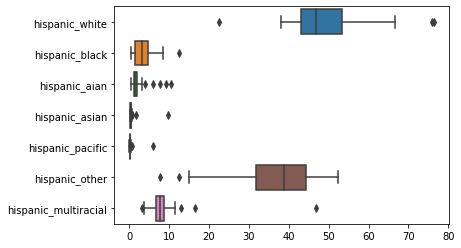

In [71]:
# Create a boxplot
sns.boxplot(data = states_hr, orient = "h")
plt.show()

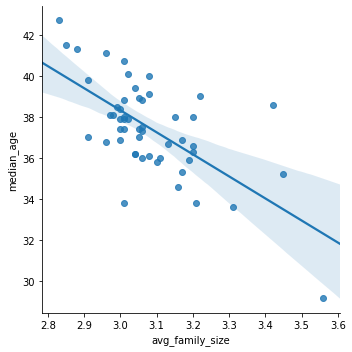

In [65]:
# Scatterplot with regression line
sns.lmplot(x = "avg_family_size", y = "median_age", data = states_api1)
plt.show()

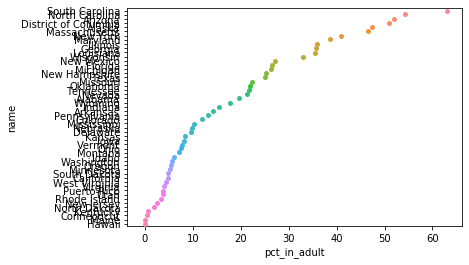

<Figure size 2160x2160 with 0 Axes>

In [70]:
sns.stripplot(x = "pct_in_adult", y = "name", data = states_api2)
plt.show()